In [83]:
print("Carolina")

Carolina


## Overview

This project provides a comprehensive analysis of box office performance for movies. The goal is to offer valuable insights to a Company's newly established movie studio. The analysis covers various aspects of movies, such as genres, ratings, budgets, and release dates, to uncover the factors that contribute to a successful box office performance.



## Business Problem


The Company sees all the big companies creating original video content, and they want to get in on the fun. They have decided to create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired me to help them better understand the movie industry. My team is charged with exploring what type of films are currently doing the best at the box office. We must then translate those findings into actionable insights that the head of Company's new movie studio can use to help decide what type of films to create.



## Data Understanding



To answer the business questions, I've utilized various datasets including the IMBD Database,which is one of the biggest and detailed database on movie data and then selected the following that have relevant factors such as ratings and genres of past movies to guide our insights and recommendations. We also used TheNumbers for profit analysis and Rotten Tomatoes datasets for movie runtimes.

In [84]:
# starting imports

import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure
import seaborn as sns 
pd.set_option('display.max_rows', 100) 
from matplotlib.ticker import StrMethodFormatter

In [85]:
movie_gross = pd.read_csv('mydata/bom.movie_gross.csv')

'''
The movie_gross file contain information about movie gross earnings.
'''
# Show the first few rows of the DataFrame
movie_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00000,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00000,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00000,664300000,2010
3,Inception,WB,292600000.00000,535700000,2010
4,Shrek Forever After,P/DW,238700000.00000,513900000,2010


In [86]:
rt_movie = pd.read_csv('mydata/rt.movie_info.tsv', sep='\t')
for column in ["box_office"]:
    rt_movie[column] = rt_movie[column].str.replace('$', '').str.replace(',', '').astype(float)



# Show the first few rows of the DataFrame
rt_movie.head()

# # Filter the DataFrame to show rows where 'id' is equal to 30
# filtered_df = rt_movie[rt_movie['id'] == 12444]

# # Display the filtered DataFrame
# filtered_df


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.00000,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [87]:
rt_review = pd.read_csv('mydata/rt.reviews.tsv', sep='\t', encoding='latin-1')

'''
The rt_review file contain reviews for movies.
'''

# Show the first few rows of the DataFrame
rt_review.head()
# rt_review.info()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [88]:
tmdb_movies = pd.read_csv('mydata/tmdb.movies.csv', index_col='Unnamed: 0',)

'''
A list of genre IDs associated with the movie.
'''

# Show the first few rows of the DataFrame
tmdb_movies.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53300,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70000,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73400,2010-03-26,How to Train Your Dragon,7.70000,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.51500,2010-05-07,Iron Man 2,6.80000,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00500,1995-11-22,Toy Story,7.90000,10174
4,"[28, 878, 12]",27205,en,Inception,27.92000,2010-07-16,Inception,8.30000,22186


In [89]:
# movie_budgets = pd.read_csv('mydata/tn.movie_budgets.csv')
# # Remove dollar sign and commas, and convert to numeric type
# for column in ["production_budget", "domestic_gross", "worldwide_gross"]:
#     movie_budgets[column] = movie_budgets[column].str.replace('$', '').str.replace(',', '').astype(float)


# '''
# The movie_budgets file contain information about movie budgets and earnings. 

# '''

# # Create a new column 'title' and assign the values from the 'movie' column to it
# movie_budgets['title'] = movie_budgets['movie']


# # Show the first few rows of the DataFrame
# movie_budgets.head()

In [90]:
tn_df = pd.read_csv('mydata/tn.movie_budgets.csv')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


The im.db dataset comprises of multiple tables containing information about movies. The tables of interest are: movie_basics and movie_ratings.

The movie_basics table includes movie titles, release year, and genres. The movie_ratings table includes average movie rating and number of votes. The
primary key for both tables is movie_id which will help in joining the two tables.

Creating a Connection to the relational database from im.db using module sqlite3

In [91]:
path = "mydata/im.db"
conn = sqlite3.connect(path) 

# loading data from the im.db file
imdb_tables = """
SELECT name 
FROM sqlite_master 
    WHERE type = 'table';
"""

# print tables in the sql database
pd.read_sql(imdb_tables, conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


Viewing relevant information from the database, i.e Movie rating and the Movie basic table

In [92]:
basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
""", conn)

In [93]:
# previous cell shows a few nulls in original_title, several more in
# runtime_minutes and genras, I will potentially drop those


# two columns have numerical data, runtime_mines and start_year

# the range for start_year is from 2010 to 2115, which can mean incorrect 
# data or future releases
basics_df.describe()

,start_year,runtime_minutes
count,146144.00000,114405.00000
mean,2014.62180,86.18725
std,2.73358,166.36059
min,2010.00000,1.00000
25%,2012.00000,70.00000
50%,2015.00000,87.00000
75%,2017.00000,99.00000
max,2115.00000,51420.00000


In [94]:
# Exploring the movie_ratings table from the sql data, there are no nulls in this table
ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings

""", conn)

ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.30000,31
1,tt10384606,8.90000,559
2,tt1042974,6.40000,20
3,tt1043726,4.20000,50352
4,tt1060240,6.50000,21


In [95]:
# removing significant figures
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# The mean rating is 6.3 and it looks like there are no incorrect entries
# the numvotes column looks like it has an outlier

ratings_df.describe()

,averagerating,numvotes
count,73856.00000,73856.00000
mean,6.33273,3523.66217
std,1.47498,30294.02297
min,1.00000,5.00000
25%,5.50000,14.00000
50%,6.50000,49.00000
75%,7.40000,282.00000
max,10.00000,1841066.00000


## Data Preparation and Cleaning
 joining the movie_basics table that contains movie_id and genres and the movie_ratings table to analyze which genres were the most popular.

In [96]:
genres_ratings_df = pd.read_sql("""

SELECT mb.movie_id AS Movie_ID, mb.primary_title AS Title, mb.start_year AS Year, mb.genres AS Genre, mr.averagerating AS Rating, mr.numvotes AS Votes
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id

""", conn)

genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50000,119
...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70000,136
73853,tt9914642,Albatross,2017,Documentary,8.50000,8
73854,tt9914942,La vida sense la Sara Amat,2019,None,6.60000,5


In [97]:
# after join, since we didn't add the runtime column, there are only nulls in the Genre column
# there are now 73856 entries, as we merged on movie_id, the entries without id were not added

genres_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Movie_ID  73856 non-null  object 
 1   Title     73856 non-null  object 
 2   Year      73856 non-null  int64  
 3   Genre     73052 non-null  object 
 4   Rating    73856 non-null  float64
 5   Votes     73856 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.4+ MB


In [98]:
genres_ratings_df['Rating'] = pd.to_numeric(genres_ratings_df['Rating'], errors='coerce')

In [99]:
genres_ratings_df.isna().sum()


Movie_ID      0
Title         0
Year          0
Genre       804
Rating        0
Votes         0
dtype: int64

In [100]:
# dropping nulls in genre column
# total number of rows is now 73052

genres_ratings_df = genres_ratings_df.dropna(subset=['Genre'])

genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,Drama,6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy",6.50000,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,Documentary,6.20000,5
73851,tt9913084,Diabolik sono io,2019,Documentary,6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"Drama,Family",8.70000,136
73853,tt9914642,Albatross,2017,Documentary,8.50000,8


In [101]:
genres_ratings_df = genres_ratings_df.dropna(subset=['Rating'])


In [102]:
genres_ratings_df.isna().sum()

Movie_ID    0
Title       0
Year        0
Genre       0
Rating      0
Votes       0
dtype: int64

In [103]:
# checking the year range, from 2010 to 2019
genres_ratings_df.groupby('Year').count()

,Movie_ID,Title,Genre,Rating,Votes
Year,,,,,
2010,6701,6701,6701,6701,6701
2011,7274,7274,7274,7274,7274
2012,7602,7602,7602,7602,7602
2013,7905,7905,7905,7905,7905
2014,8269,8269,8269,8269,8269
2015,8405,8405,8405,8405,8405
2016,8613,8613,8613,8613,8613
2017,8638,8638,8638,8638,8638
2018,7476,7476,7476,7476,7476


In [104]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)


genres_ratings_df.describe()

,Year,Rating,Votes
count,73052.00000,73052.00000,73052.00000
mean,2014.28143,6.33093,3562.17263
std,2.61529,1.47470,30458.03757
min,2010.00000,1.00000,5.00000
25%,2012.00000,5.50000,14.00000
50%,2014.00000,6.50000,50.00000
75%,2017.00000,7.40000,289.00000
max,2019.00000,10.00000,1841066.00000


In [105]:
# there are no duplicate movie ids but possible duplicate names

genres_ratings_df.describe(include='object')

,Movie_ID,Title,Genre
count,73052,73052,73052
unique,73052,69248,923
top,tt0063540,The Return,Drama
freq,1,11,11612


In [106]:
# creating new column for movies with multiple genres into a list 
# then we can use .explode() to break them 

# genres_ratings_df['Genre'] = genres_ratings_df['Genre'].str.split(',')

genres_ratings_df.loc[:, 'Genre'] = genres_ratings_df['Genre'].str.split(',')


In [107]:
genres_ratings_df

,Movie_ID,Title,Year,Genre,Rating,Votes
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.00000,77
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]",7.20000,43
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.90000,4517
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.10000,13
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]",6.50000,119
...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,[Documentary],6.20000,5
73851,tt9913084,Diabolik sono io,2019,[Documentary],6.20000,6
73852,tt9914286,Sokagin Çocuklari,2019,"[Drama, Family]",8.70000,136
73853,tt9914642,Albatross,2017,[Documentary],8.50000,8


In [108]:
# creating new column with first genre
# genres_ratings_df['Genres1'] = genres_ratings_df['Genre'].apply(lambda x: x[0])
# genres_ratings_df

genres_ratings_df.loc[:, 'Genres1'] = genres_ratings_df['Genre'].apply(lambda x: x[0])
genres_ratings_df


,Movie_ID,Title,Year,Genre,Rating,Votes,Genres1
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]",7.00000,77,Action
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]",7.20000,43,Biography
2,tt0069049,The Other Side of the Wind,2018,[Drama],6.90000,4517,Drama
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]",6.10000,13,Comedy
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]",6.50000,119,Comedy
...,...,...,...,...,...,...,...
73850,tt9913056,Swarm Season,2019,[Documentary],6.20000,5,Documentary
73851,tt9913084,Diabolik sono io,2019,[Documentary],6.20000,6,Documentary
73852,tt9914286,Sokagin Çocuklari,2019,"[Drama, Family]",8.70000,136,Drama
73853,tt9914642,Albatross,2017,[Documentary],8.50000,8,Documentary


In [109]:
# converting 'Year' to str so it won't show in aggregate
# genres_ratings_df['Year'] = genres_ratings_df['Year'].astype(str)

genres_ratings_df.loc[:, 'Year'] = genres_ratings_df['Year'].astype(str)


In [110]:
print(genres_ratings_df.dtypes)


Movie_ID     object
Title        object
Year         object
Genre        object
Rating      float64
Votes         int64
Genres1      object
dtype: object


In [111]:
genres_ratings_df['Rating'] = pd.to_numeric(genres_ratings_df['Rating'], errors='coerce')


In [112]:
genres_ratings_df = genres_ratings_df.dropna(subset=['Rating'])


In [113]:

# avg_rating_genre = genres_ratings_df.groupby('Genres1').mean().sort_values(by='Rating', ascending=False)
# avg_rating_genre

avg_rating_genre = genres_ratings_df.groupby('Genres1').agg({'Rating': 'mean'}).sort_values(by='Rating', ascending=False)
avg_rating_genre



,Rating
Genres1,
Game-Show,9.00000
Music,7.50677
Documentary,7.31660
Biography,7.17451
Sport,6.94494
Musical,6.63725
History,6.41324
Adventure,6.38671
Drama,6.37056


In [114]:
# num of movies per genre
movies_per_genre = genres_ratings_df.groupby('Genres1')['Movie_ID'].count()
avg_rating_genre['movies_per_genre'] = movies_per_genre
avg_rating_genre

,Rating,movies_per_genre
Genres1,,
Game-Show,9.00000,1
Music,7.50677,192
Documentary,7.31660,13962
Biography,7.17451,3433
Sport,6.94494,89
Musical,6.63725,153
History,6.41324,136
Adventure,6.38671,2596
Drama,6.37056,18572


In [115]:
# filtering out genres with less than 1000 movies
# this list is the top rated genres with more than 1000 movies

avg_rating_genre2 = avg_rating_genre.loc[avg_rating_genre['movies_per_genre'] > 1000].sort_values(by='Rating', ascending=False)
avg_rating_genre2

,Rating,movies_per_genre
Genres1,,
Documentary,7.31660,13962
Biography,7.17451,3433
Adventure,6.38671,2596
Drama,6.37056,18572
Crime,6.15910,2494
Comedy,5.99851,14649
Action,5.81036,6988
Thriller,5.70781,1563
Horror,4.85697,4490


In [116]:
# looking at tn dataset for profit information
# tn_df.info()
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [117]:
# Dropped the release date as it is not important to compare with production budget, domestic and worldwide gross.

updated_tn_df = tn_df.drop(columns=['release_date'])
updated_tn_df


# From here on out, we will replace the production_budget, domestic_gross, and worldwide_gross with integers as they 
# are currently strings. 
# We will do this to sort the values in ascending order from the least gross to the most of both domestic_gross and 
# worldwide_gross.

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,78,Red 11,"$7,000",$0,$0
5778,79,Following,"$6,000","$48,482","$240,495"
5779,80,Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,A Plague So Pleasant,"$1,400",$0,$0


In [118]:
# formatting 
updated_tn_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)
updated_tn_df['production_budget'] = updated_tn_df['production_budget'].str.replace('$', '').str.replace(',', '').astype(int)

updated_tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)
updated_tn_df['domestic_gross'] = updated_tn_df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(int)

updated_tn_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
updated_tn_df['worldwide_gross'] = updated_tn_df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)


# Now we will sort the values from descending order for the domestic_gross first and then the worldwide_gross
updated_tn_df.sort_values('domestic_gross', ascending=False)
updated_tn_df.sort_values('worldwide_gross', ascending=False)

,id,movie,production_budget,domestic_gross,worldwide_gross
0,1,Avatar,425000000,760507625,2776345279.00000
42,43,Titanic,200000000,659363944,2208208395.00000
5,6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220.00000
6,7,Avengers: Infinity War,300000000,678815482,2048134200.00000
33,34,Jurassic World,215000000,652270625,1648854864.00000
...,...,...,...,...,...
5474,75,Insomnia Manica,500000,0,0.00000
5473,74,Girls Gone Dead,500000,0,0.00000
5472,73,Enter Nowhere,500000,0,0.00000
5471,72,Drones,500000,0,0.00000


In [119]:
# We will then create two additional columns to include the profit from domestic and the profit from worldwide. 
# We will also order them in ascending order for both columns
updated_tn_df['Profit from Domestic'] = updated_tn_df['domestic_gross'] - updated_tn_df['production_budget']
updated_tn_df['Profit from Worldwide'] = updated_tn_df['worldwide_gross'] - updated_tn_df['production_budget']
updated_tn_df.sort_values('Profit from Domestic', ascending=False)
updated_tn_df.sort_values('Profit from Worldwide', ascending=False)

,id,movie,production_budget,domestic_gross,worldwide_gross,Profit from Domestic,Profit from Worldwide
0,1,Avatar,425000000,760507625,2776345279.00000,335507625,2351345279.00000
42,43,Titanic,200000000,659363944,2208208395.00000,459363944,2008208395.00000
6,7,Avengers: Infinity War,300000000,678815482,2048134200.00000,378815482,1748134200.00000
5,6,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220.00000,630662225,1747311220.00000
33,34,Jurassic World,215000000,652270625,1648854864.00000,437270625,1433854864.00000
...,...,...,...,...,...,...,...
352,53,Town & Country,105000000,6712451,10364769.00000,-98287549,-94635231.00000
341,42,Men in Black: International,110000000,3100000,3100000.00000,-106900000,-106900000.00000
193,94,Mars Needs Moms,150000000,21392758,39549758.00000,-128607242,-110450242.00000
194,95,Moonfall,150000000,0,0.00000,-150000000,-150000000.00000


In [120]:
# looking at rt dataset for runtime info
# rt_info_df
rt_movie

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.00000,108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,33886034.00000,106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [121]:
# copying my orignal dataframe to another dataframe
run_time = rt_movie.copy()
# dropping the columns that I dont need.
remove_columns = ['synopsis', 'rating', 'writer', 'theater_date', 'dvd_date', 'currency', 'id', 'studio', 'director']
run_time.drop(columns=remove_columns, inplace=True)

In [122]:
# datacleaning
# dropping NA from box office and runtime
run_time.dropna(subset=['box_office'], inplace=True)
run_time.dropna(subset=['runtime'], inplace=True)
run_time

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000.00000,108 minutes
6,Comedy,41032915.00000,82 minutes
7,Drama,224114.00000,123 minutes
8,Drama,134904.00000,117 minutes
15,Comedy|Drama|Mystery and Suspense,1039869.00000,108 minutes
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935.00000,119 minutes
1542,Comedy|Drama,1416189.00000,129 minutes
1545,Horror|Mystery and Suspense,59371.00000,98 minutes
1546,Art House and International|Comedy|Drama,794306.00000,97 minutes


In [123]:
# stripping minutes(unit) off from runtime column
run_time['runtime']=run_time['runtime'].str.strip(' minutes')
run_time['runtime'] = (run_time['runtime'].astype(int))
run_time

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000.00000,108
6,Comedy,41032915.00000,82
7,Drama,224114.00000,123
8,Drama,134904.00000,117
15,Comedy|Drama|Mystery and Suspense,1039869.00000,108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935.00000,119
1542,Comedy|Drama,1416189.00000,129
1545,Horror|Mystery and Suspense,59371.00000,98
1546,Art House and International|Comedy|Drama,794306.00000,97


In [124]:
# cleaning box_office values.

def clean_a_money_column(df, series_title):
    
    df[series_title] = df[series_title].astype(str).str.replace('$','')
    df[series_title] = df[series_title].astype(str).str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df

run_time = clean_a_money_column(run_time,'box_office')
display(run_time)

,genre,box_office,runtime
1,Drama|Science Fiction and Fantasy,600000.00000,108
6,Comedy,41032915.00000,82
7,Drama,224114.00000,123
8,Drama,134904.00000,117
15,Comedy|Drama|Mystery and Suspense,1039869.00000,108
...,...,...,...
1541,Action and Adventure|Science Fiction and Fantasy,25335935.00000,119
1542,Comedy|Drama,1416189.00000,129
1545,Horror|Mystery and Suspense,59371.00000,98
1546,Art House and International|Comedy|Drama,794306.00000,97


In [146]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 1 to 1555
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   genre       338 non-null    object 
 1   box_office  338 non-null    float64
 2   runtime     338 non-null    int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 9.2+ KB


In [149]:
# looking at only the top 50 movies
top_50_movies=run_time['box_office'].value_counts()
run_time.sort_values(by='runtime', ascending=False, inplace=True)
run_time.iloc[0:50]

# top_50_movies=run_time.loc[:,['box_office', 'runtime']].value_counts()
# top_50_movies.sort_values( by= 'runtime',ascending=False, inplace=True)
# top_50_movies.iloc[0:50]

,genre,box_office,runtime
1350,Classics|Drama,12900000.00000,229
146,Drama,1626289.00000,188
877,Action and Adventure|Science Fiction and Fantasy,303001229.00000,170
787,Drama|Science Fiction and Fantasy|Romance,127490802.00000,166
1117,Kids and Family|Science Fiction and Fantasy,261835892.00000,161
1207,Action and Adventure|Drama|Mystery and Suspens...,707672.00000,161
927,Action and Adventure|Drama|Western,3900000.00000,159
1161,Drama|Mystery and Suspense,102515793.00000,157
1402,Action and Adventure|Drama,18173360.00000,148
527,Drama|Mystery and Suspense,6100613.00000,148


In [150]:
def bin_helper(runtime):
    if runtime < 100:
        return '0-99'
    elif runtime > 140:
        return '140+'
    else:
        return '100-140'

In [153]:
run_time['run_time_binned']= run_time['runtime'].map(bin_helper)

In [155]:
run_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338 entries, 1350 to 177
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   genre            338 non-null    object 
 1   box_office       338 non-null    float64
 2   runtime          338 non-null    int32  
 3   run_time_binned  338 non-null    object 
dtypes: float64(1), int32(1), object(2)
memory usage: 11.9+ KB


In [173]:
run_time
               

,genre,box_office,runtime,run_time_binned
1350,Classics|Drama,12900000.00000,229,140+
146,Drama,1626289.00000,188,140+
877,Action and Adventure|Science Fiction and Fantasy,303001229.00000,170,140+
787,Drama|Science Fiction and Fantasy|Romance,127490802.00000,166,140+
1117,Kids and Family|Science Fiction and Fantasy,261835892.00000,161,140+
...,...,...,...,...
329,Comedy,2839456.00000,70,0-99
747,Documentary|Special Interest,104286.00000,70,0-99
958,Animation|Kids and Family,18013938.00000,67,0-99
704,Comedy|Documentary|Science Fiction and Fantasy...,16302332.00000,59,0-99


In [174]:
#median of runtime
rn_grouped = run_time.groupby('run_time_binned')[['runtime','box_office']].median()
rn_grouped


,runtime,box_office
run_time_binned,,
0-99,91.00000,12883277.00000
100-140,114.00000,18602895.00000
140+,157.00000,6100613.00000


## Results

### Recommendation 1

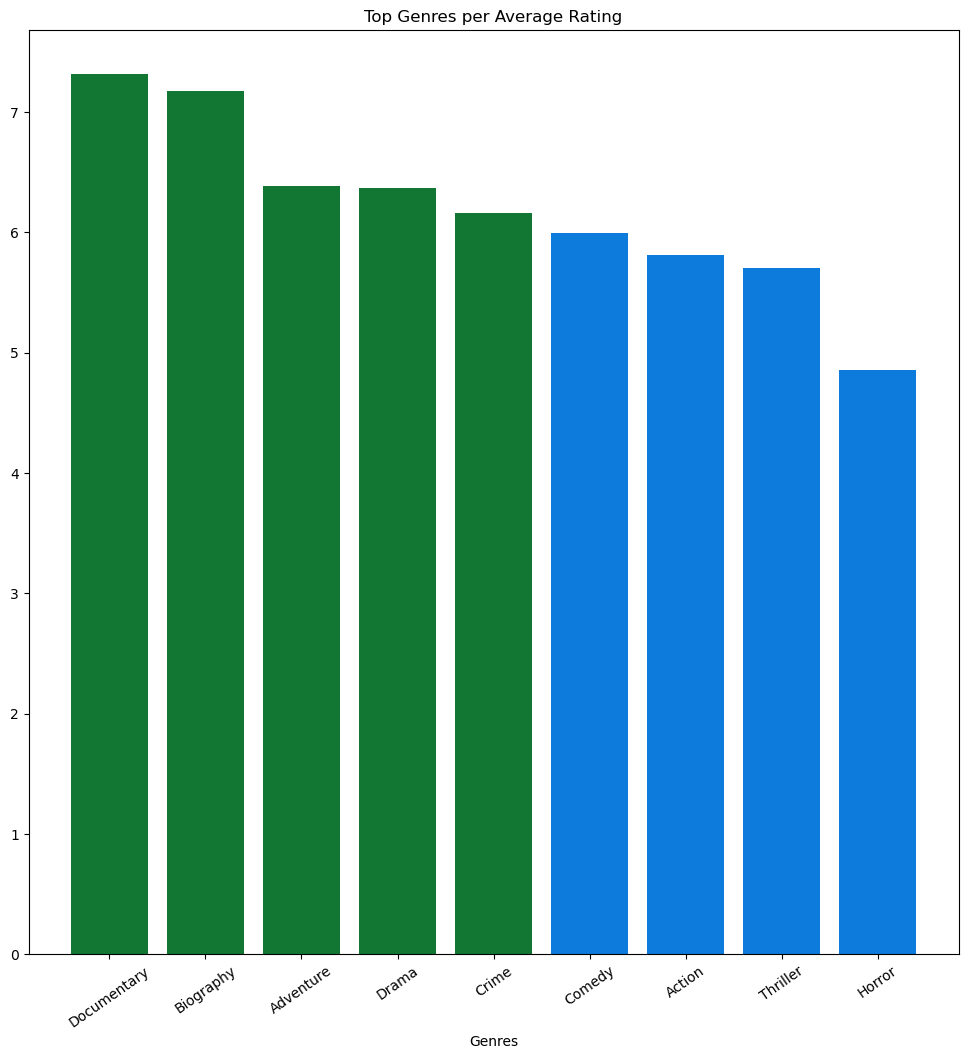

In [175]:
figure, ax = plt.subplots(figsize=(12, 12))

color = ['#117733','#117733','#117733','#117733','#117733', '#0C7BDC', '#0C7BDC', '#0C7BDC', '#0C7BDC']
# color palates for color blindness:
# https://davidmathlogic.com/colorblind/#%23332288-%23117733-%235FA599-%233EA6DA-%23DDCC77-%23CC6677-%23AA4499-%23882255

ax.bar(x = avg_rating_genre2.index , height = avg_rating_genre2['Rating'],
                                       color = color )
ax.set_title('Top Genres per Average Rating')
ax.set_xlabel('Genres')

plt.xticks(rotation = 35 )

plt.savefig('Images/top_genres.png', dpi=300);

### Recommendation 2

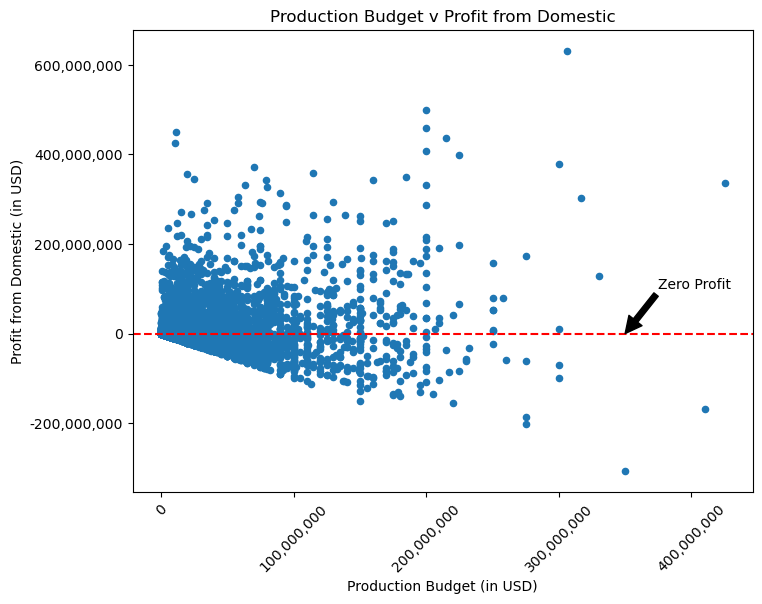

In [185]:
updated_tn_df.plot(x='production_budget', y='Profit from Domestic', kind='scatter', figsize=(8,6))

plt.xticks(rotation=45)

plt.xlabel('Production Budget (in USD)')
plt.ylabel('Profit from Domestic (in USD)')
plt.title('Production Budget v Profit from Domestic')

plt.ticklabel_format(style='plain', axis='both', useMathText=True)

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.axhline(y=0, color='red', linestyle='--')
plt.annotate('Zero Profit', xy=(350000000,0), xytext=(375000000, 100000000), arrowprops={'facecolor': 'black'})


plt.savefig('Images/Budget_vs_domestic_profit.png', dpi=300);

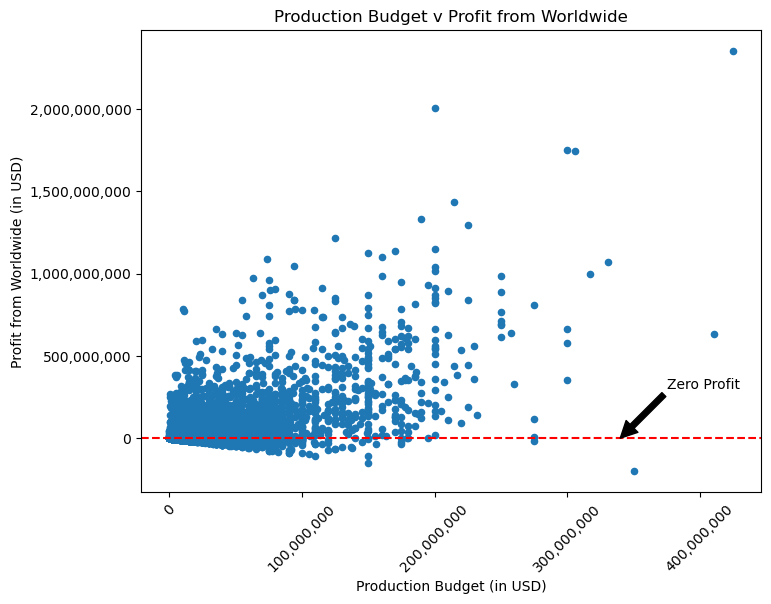

In [184]:
updated_tn_df.plot(x='production_budget', y='Profit from Worldwide', kind='scatter', figsize=(8,6))

plt.xticks(rotation=45)

plt.xlabel('Production Budget (in USD)')
plt.ylabel('Profit from Worldwide (in USD)')
plt.title('Production Budget v Profit from Worldwide')

plt.ticklabel_format(style='plain', axis='both', useMathText=True)

plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.axhline(y=0, color='red', linestyle='--')
plt.annotate('Zero Profit', xy=(340000000,0), xytext=(375000000, 300000000), arrowprops={'facecolor': 'black'})

plt.savefig('Images/Budget_vs_worldwide_profit.png', dpi=300);

In [179]:
# At last, we will compute the mean for both profit from domestic and the profit from worldwide.
mean1 = updated_tn_df['Profit from Domestic'].mean()
mean2 = updated_tn_df['Profit from Worldwide'].mean()

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

ax.bar(['Domestic', 'Worldwide'], [mean1, mean2])

ax.set_title('Mean Profit from Domestic V. Worldwide Gross')
ax.set_ylabel('Profit (in USD)')

ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.ticklabel_format(style='plain', axis='y', useOffset=False)


plt.savefig('Images/Domestic_vs_Worldwide_mean.png', dpi=300);

### Recommendation 3

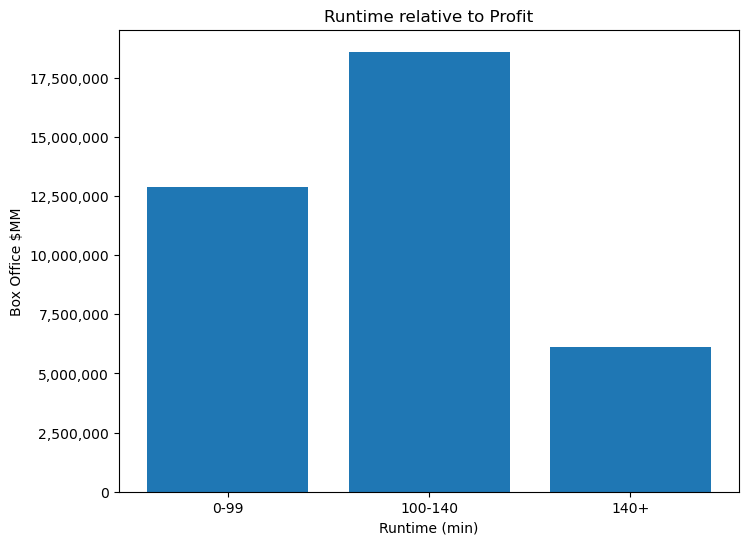

In [182]:
#scatter plot of relationship between runtime and boxoffice profit.

x= rn_grouped.index
y= rn_grouped['box_office']
fig, ax = plt.subplots(figsize = (8,6))
plt.ticklabel_format(style='plain')

ax.bar(x,y)
ax.set_title('Runtime relative to Profit')
ax.set_xlabel('Runtime (min)')
ax.set_ylabel('Box Office $MM')
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.savefig('Images/Runtime_vs_profit.png', dpi=300);

## Conclusion And Recommendations

Based on the information in the data sets, we can see the highest rated genres are Documentary, Biography, Adventure, Drama, Crime, Comedy, Action, Thriller and Horror. We recommend venturing into those fields as we explore what types of movies to make at Microsof's new studio.

In order to breakout into the movie scene by creating a new movie studio, Microsoft must expand into foreign markets as well as there is a better profit margin in international markets than just domestically in the United States.There is about a $50 million dollar difference in mean profit between international movies than just domestic movies alone.On top of that, the highest grossing movies with the most profit are franchise movies such as "Marvel Studios", "The Fast & The Furious Saga", "The Star Wars Saga", & "The Harry Potter Movies". It is imperative for Microsoft to start a movie studio based on a franchise that movie fans can really get behind.

Based on the above analysis the movies that have made the most profit are not very long nor are they very short. Most successfull movies at box office have runtime between 100-140 minutes.

## Next Steps
This dataset looks at movie information from 2010-2019. As seen on the graph, some genres that have been popular in the last few years such as Action and Comedy are on the lower end of the spectrum and is worth considering other measures in addition to genre to determine not just volume, but the profits involved in those genres. Profit, ROI or gross were not included in this dataset.